[*********************100%***********************]  1 of 1 completed


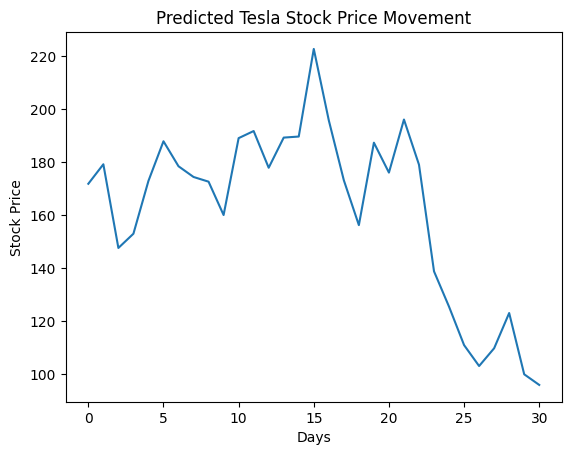

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Define the states
states = ["up", "down", "stable"]

# Define the number of states
num_states = len(states)

# Define the transition matrix
transition_matrix = np.zeros((num_states, num_states))

# Define the number of days for prediction
num_days = 30

# Define the start date and end date for data retrieval
start_date = "2010-01-01"
end_date = "2023-05-09"

# Retrieve Tesla stock data from Yahoo Finance API
tesla = yf.download("TSLA", start=start_date, end=end_date)

# Calculate daily returns
returns = tesla["Adj Close"].pct_change()

# Clean the data by removing missing values
returns = returns.dropna()

# Define the state for each day based on daily return
state = []
for i in range(len(returns)):
    if returns[i] > 0:
        state.append(states[0])
    elif returns[i] < 0:
        state.append(states[1])
    else:
        state.append(states[2])

# Calculate the transition matrix
for i in range(len(state)-1):
    current_state = states.index(state[i])
    next_state = states.index(state[i+1])
    transition_matrix[current_state][next_state] += 1
for i in range(num_states):
    row_sum = sum(transition_matrix[i])
    if row_sum > 0:
        transition_matrix[i] /= row_sum

# Predict the future state based on the transition matrix
current_state = states.index(state[-1])
predicted_states = [current_state]
for i in range(num_days):
    probabilities = transition_matrix[current_state]
    next_state = np.random.choice(num_states, p=probabilities)
    predicted_states.append(next_state)
    current_state = next_state

# Convert predicted states to actual stock prices
predicted_prices = [tesla["Adj Close"][-1]]
for i in range(num_days):
    if predicted_states[i+1] == 0:
        predicted_prices.append(predicted_prices[-1] * (1 + np.random.normal(0.05, 0.1)))
    elif predicted_states[i+1] == 1:
        predicted_prices.append(predicted_prices[-1] * (1 - np.random.normal(0.05, 0.1)))
    else:
        predicted_prices.append(predicted_prices[-1])

# Visualize the predicted prices
plt.plot(range(len(predicted_prices)), predicted_prices)
plt.xlabel("Days")
plt.ylabel("Stock Price")
plt.title("Predicted Tesla Stock Price Movement")
plt.show()
